(<AxesSubplot:>,
 ([], []),
 ([], []))

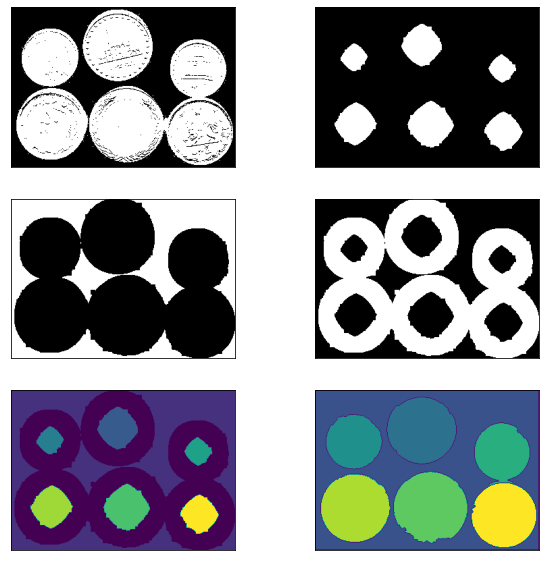

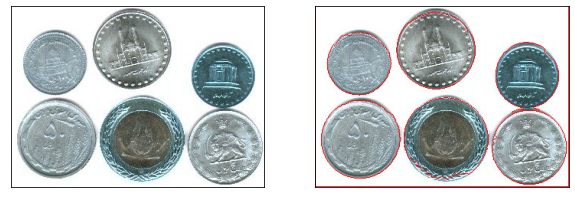

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('coins.jpg', cv.IMREAD_COLOR)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, mask = cv.threshold(gray, 240, 255, cv.THRESH_BINARY_INV)

kernel = np.ones((3,3), np.uint8)
kernel_large = np.ones((7,7), np.uint8)

sure_fg = cv.morphologyEx(mask, cv.MORPH_CLOSE , kernel, iterations = 2)
sure_fg = cv.erode(sure_fg, kernel_large, iterations = 6)

sure_bg = cv.dilate(mask, kernel, iterations=3)
sure_bg = cv.bitwise_not(sure_bg)

unsure_area = np.ones(gray.shape, np.uint8)
unsure_area = unsure_area * 255
unsure_area = unsure_area - sure_fg
unsure_area = unsure_area - sure_bg

ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1  # mark sure background and foreground areas with numbers larger than zero
markers[unsure_area==255] = 0  # mark the region of unsure area with zero value

segmentation = markers.copy()
segmentation = cv.watershed(img, segmentation)

boundary_mask = (segmentation == -1)

res = img.copy()
res[boundary_mask] = [255,0,0]

plt.figure(figsize=(10,10))
plt.subplot(3,2,1), plt.imshow(mask, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2), plt.imshow(sure_fg, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3), plt.imshow(sure_bg, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4), plt.imshow(unsure_area, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5), plt.imshow(markers), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6), plt.imshow(segmentation), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(res), plt.xticks([]), plt.yticks([])
